Importing the Dependencies

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, validation_curve
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

Data Collection and Processing

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('D:/mohamgamal/python/car_data.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.rename(columns = {'Selling_type':'Seller_Type','Driven_kms':'Kms_Driven'}, inplace = True)

In [5]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [9]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [11]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [12]:
car_dataset.drop('Car_Name',axis=1, inplace=True)

In [13]:
car_dataset['Present_Price'] = np.log(car_dataset['Present_Price'])

In [14]:
car_dataset['Kms_Driven'] = np.log(car_dataset['Kms_Driven'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1630bee4c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1630bf041f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1630bee49d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1630bf04730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1630bf049d0>],
 'means': []}

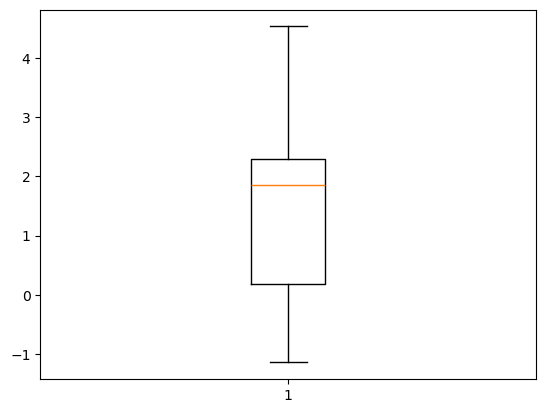

In [15]:
plt.boxplot(car_dataset['Present_Price'])

In [16]:
car_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,1.720979,10.203592,0,0,0,0
1,2013,4.75,2.255493,10.668955,1,0,0,0
2,2017,7.25,2.287471,8.839277,0,0,0,0
3,2011,2.85,1.423108,8.556414,0,0,0,0
4,2014,4.60,1.927164,10.656082,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,2.451005,10.433763,1,0,0,0
297,2015,4.00,1.774952,11.002100,0,0,0,0
298,2009,3.35,2.397895,11.384342,0,0,0,0
299,2017,11.50,2.525729,9.104980,1,0,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x16307d01fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x16307d10520>,
 'boxes': [<matplotlib.lines.Line2D at 0x16307d01d00>],
 'medians': [<matplotlib.lines.Line2D at 0x16307d10a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x16307d10d00>],
 'means': []}

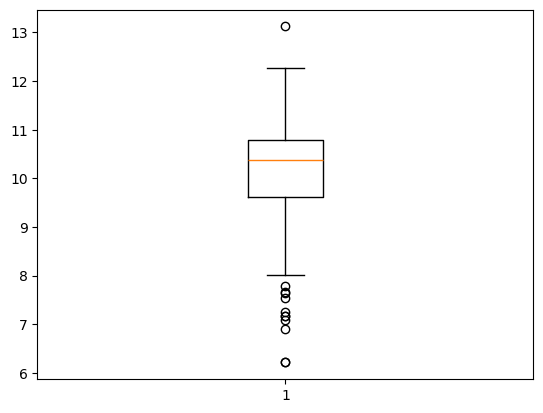

In [17]:
plt.boxplot(car_dataset['Kms_Driven'] )

In [18]:
#car_dataset.drop(['Year'], axis=1, inplace=True)

In [19]:
car_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,1.720979,10.203592,0,0,0,0
1,2013,4.75,2.255493,10.668955,1,0,0,0
2,2017,7.25,2.287471,8.839277,0,0,0,0
3,2011,2.85,1.423108,8.556414,0,0,0,0
4,2014,4.60,1.927164,10.656082,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,2.451005,10.433763,1,0,0,0
297,2015,4.00,1.774952,11.002100,0,0,0,0
298,2009,3.35,2.397895,11.384342,0,0,0,0
299,2017,11.50,2.525729,9.104980,1,0,0,0


In [20]:
car_dataset.corr(method='pearson')['Present_Price']

Year             0.000249
Selling_Price    0.756368
Present_Price    1.000000
Kms_Driven       0.357448
Fuel_Type        0.441484
Seller_Type     -0.868201
Transmission     0.193283
Owner           -0.027368
Name: Present_Price, dtype: float64

<Axes: xlabel='Kms_Driven', ylabel='Present_Price'>

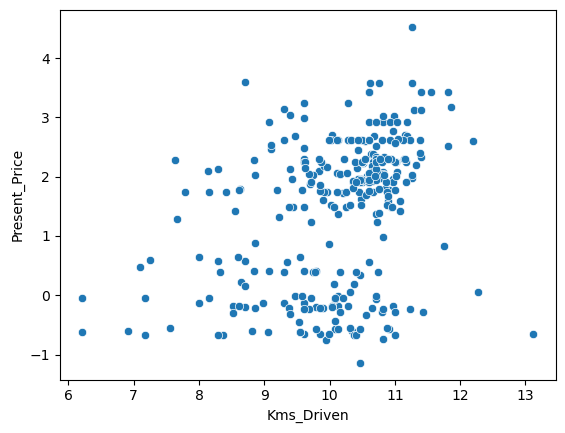

In [21]:
sns.scatterplot(data=car_dataset, x='Kms_Driven', y='Present_Price')

Splitting the data and Target

In [22]:
X = car_dataset.drop('Selling_Price', axis=1)
Y = car_dataset['Selling_Price']

In [23]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,1.720979,10.203592,0,0,0,0
1,2013,2.255493,10.668955,1,0,0,0
2,2017,2.287471,8.839277,0,0,0,0
3,2011,1.423108,8.556414,0,0,0,0
4,2014,1.927164,10.656082,1,0,0,0


In [24]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

Splitting Training and Test data

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [68]:
lin_reg = LinearRegression()

In [69]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [70]:
X_train_predicted = lin_reg.predict(X_train)

In [71]:
metrics.r2_score(Y_train, X_train_predicted)

0.7485116373789655

In [72]:
metrics.mean_squared_error(Y_train, X_train_predicted)

6.826949807140112

2. SGDRegression

In [29]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [84]:
poly_sgd_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('feature_scaling', StandardScaler()),
    ('sgd_reg', SGDRegressor(
          max_iter=np.ceil(1e6/X_train.shape[0]),
                            early_stopping=True,
                            eta0=1e-4,
                            learning_rate='invscaling',
                            tol=1e-5,
                            validation_fraction=0.1,
                            n_iter_no_change=5,
                            average=10,
                            random_state=42
    ))])


sgd_reg_cv_results = cross_validate(poly_sgd_pipeline,
                                    X_train,
                                    Y_train,
                                    cv=cv,  # shufflesplit declared above
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True,
                                    return_estimator=True)

sgd_train_error = -1 * sgd_reg_cv_results['train_score']
sgd_test_error = -1 * sgd_reg_cv_results['test_score']

print(f"Mean absolute error of SGD regression model on the train set:\n" f"{sgd_train_error.mean():.3f} +/- {sgd_train_error.std():.3f}")

print(f"Mean absolute error of SGD regression model on the test set:\n" f"{sgd_test_error.mean():.3f} +/- {sgd_test_error.std():.3f}")

C:\Users\gimep\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gimep\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean absolute error of SGD regression model on the train set:
1.705 +/- 0.182
Mean absolute error of SGD regression model on the test set:
1.657 +/- 0.315


In [89]:
sgd = poly_sgd_pipeline.fit(X_train, Y_train)

In [90]:
sgd_predicted = sgd.predict(X_train)

In [91]:
metrics.r2_score(Y_train, sgd_predicted)

0.7774694738879464

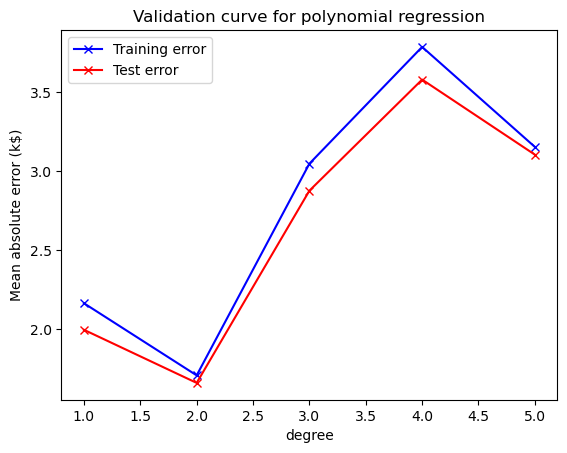

In [95]:
degree = [1, 2, 3, 4, 5]

train_scores, test_scores = validation_curve(
    poly_sgd_pipeline, X_train, Y_train, param_name='poly__degree',
    param_range=degree, cv=cv, scoring='neg_mean_absolute_error', n_jobs=2
)

train_errors, test_errors = -train_scores, -test_scores
plt.plot(degree, train_errors.mean(axis=1), 'b-x', label="Training error")
plt.plot(degree, test_errors.mean(axis=1), 'r-x', label="Test error")
plt.legend()

plt.xlabel("degree")
plt.ylabel("Mean absolute error (k$)")
plt.title("Validation curve for polynomial regression")
plt.show()

In [131]:
poly_sgd_l2_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('feature_scaling', StandardScaler()),
    ('sgd_reg', SGDRegressor(
          max_iter=np.ceil(1e6/X_train.shape[0]),
                            early_stopping=True,
                            eta0=1e-4,
                            learning_rate='adaptive',
                            tol=1e-5,
                            validation_fraction=0.1,
                            n_iter_no_change=5,
                            average=10,
                            random_state=42,
                            penalty='elasticnet',
                            alpha=0.01, l1_ratio=0.3
    ))])


sgd_reg_l2_cv_results = cross_validate(poly_sgd_l2_pipeline,
                                    X_train,
                                    Y_train,
                                    cv=cv,  # shufflesplit declared above
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True,
                                    return_estimator=True)

sgd_train_error = -1 * sgd_reg_l2_cv_results['train_score']
sgd_test_error = -1 * sgd_reg_l2_cv_results['test_score']

print(f"Mean absolute error of SGD regression model on the train set:\n" f"{sgd_train_error.mean():.3f} +/- {sgd_train_error.std():.3f}")

print(f"Mean absolute error of SGD regression model on the test set:\n" f"{sgd_test_error.mean():.3f} +/- {sgd_test_error.std():.3f}")

Mean absolute error of SGD regression model on the train set:
1.523 +/- 0.278
Mean absolute error of SGD regression model on the test set:
1.485 +/- 0.362


In [132]:
sgd_l2 = poly_sgd_l2_pipeline.fit(X_train, Y_train)
sgd_predicted_l2 = sgd_l2.predict(X_train)
metrics.r2_score(Y_train, sgd_predicted_l2)

0.7949717018516043